In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

# Chap.2 : *What is statistical learning?*

## The `advertising` dataset

First, we load the dataset, and we separate the *target* from the *features*:

In [65]:
df_adv = pd.read_csv("../data/Advertising.csv")
# Define the output variable:
y = df_adv["Sales"].values
# Define the features:
label_adv = ["TV", "Radio","Newspaper"]
X = df_adv[label_adv].values


# Split train/test data:
data_adv = np.column_stack((X,y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We then fit a linear regression model on each feature using scikit-learn:

In [64]:
theta = []
theta_0 = []
for d in range(X.shape[1]):
    reg_adv = LinearRegression()
    reg_adv.fit(X[:,d].reshape(-1,1), y) # reshape kills DeprecateWarning
    theta.append(reg_adv.coef_)
    theta_0.append(reg_adv.intercept_)

Finally, we plot the data (in red) and the values predicted by the linear model (in blue):

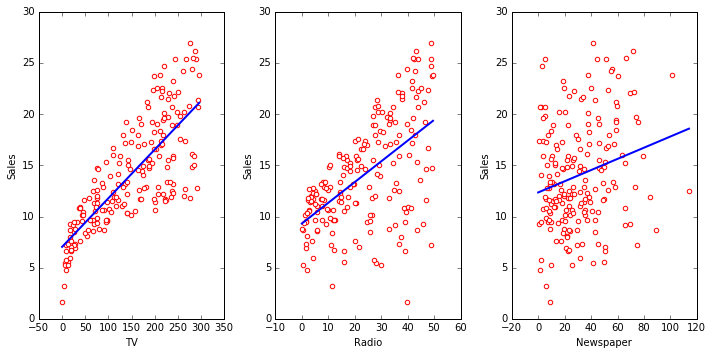

In [70]:
f, (ax1, ax2, ax3) = plt.subplots(1,3)
for i, ax in enumerate([ax1, ax2, ax3]):
    x_axis = np.linspace(0,np.max(X[:,i]), 200)
    ax.scatter(X[:,i], y, facecolors='white', edgecolors='r')
    ax.plot(x_axis, theta_0[i] + theta[i]*x_axis, lw=2)
    ax.set_xlabel(label_adv[i])
    ax.set_ylabel("Sales")
f.tight_layout()
